In [3]:
import os

print("Current Working Directory:", os.getcwd())
import tf_inference


Current Working Directory: C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\onnx_inference


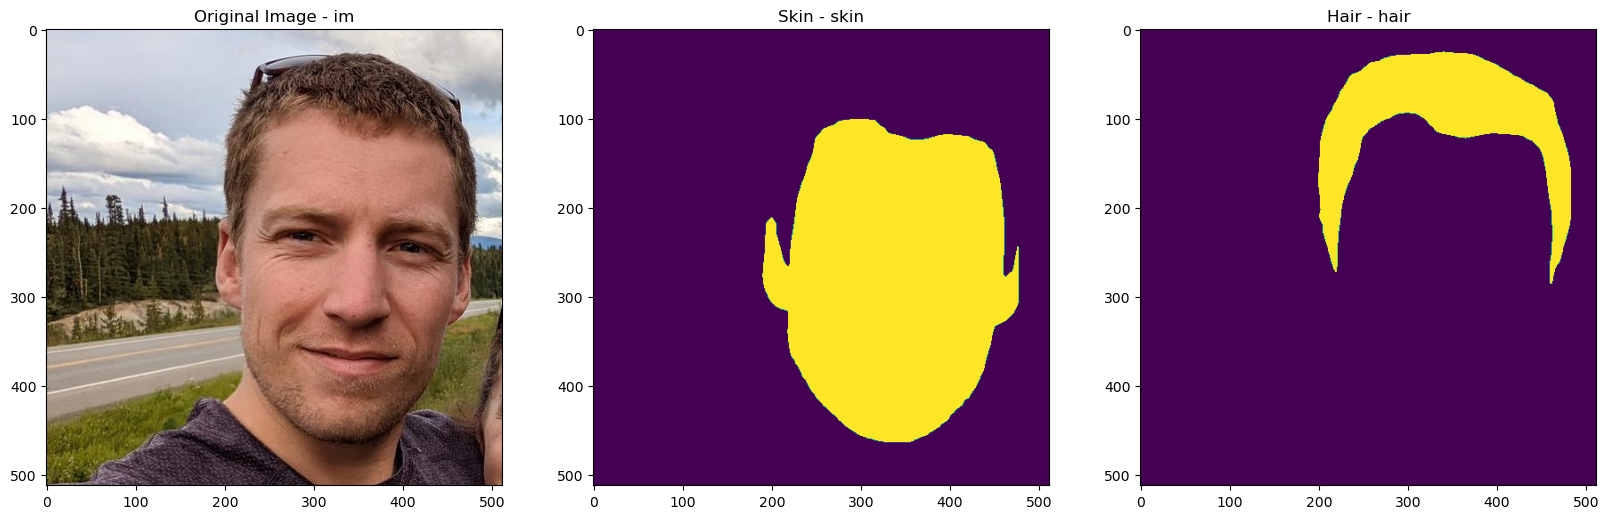

In [8]:
import sys
# !pip install rembg
import torch
import os
import os.path as osp
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
import pickle
import importlib
import torch_face
from torch_face import face_part_segmentation as fps
importlib.reload(torch_face)
im_path = r"C:\Desktop\joel.jpg"
im = Image.open(im_path)
im = im.convert('RGB')
im = np.array(im)
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
combined = ['l_ear', 'r_ear','skin', 'mouth', 'nose']
segmenter = fps.FacePartSegmentation()
skin, mask = segmenter.get_skin(im)

hair = segmenter.get_hair(im)
ax[0].imshow(im)
ax[0].set_title('Original Image - im')
ax[1].imshow(mask)
ax[1].set_title('Part Mask - part_mask')
ax[1].imshow(skin)
ax[1].set_title('Skin - skin')
ax[2].imshow(hair)
ax[2].set_title('Hair - hair')
plt.show()



In [ ]:


# !mamba install -c conda-forge tensorflow
# !mamba install -c conda-forge tensorflow-gpu
import sys
import tf_inference 
from tf_inference import tf_ae as TensorFlowAutoencoder
import importlib
importlib.reload(tf_inference)
sys.path.append('fitzpatrick')
def apply_changes_to_skin_channel(chromophore_map, channel_index, skin_mask=None):
    if skin_mask is None:
        skin_mask = np.ones_like(chromophore_map).astype(bool)
    # Ensure the mask is boolean and the same shape as the chromophore map's spatial dimensions
    skin_mask = skin_mask.astype(bool)
    
    # Extract the specified channel from the chromophore map
    channel_to_modify = chromophore_map[:, :, channel_index]

    # Apply changes only to the skin regions of the specified channel
    modified_channel = channel_to_modify.copy()
    modified_channel[skin_mask] = (channel_to_modify[skin_mask] * 0.5) + 0.0

    # Place the modified channel back into the chromophore map
    modified_map = chromophore_map.copy()
    modified_map[:, :, channel_index] = modified_channel

    return modified_map
def reverse_gamma_correction(img):
    """Reverse gamma correction on an image."""
    #if image > 1
    if np.max(img) > 1:
        img = img / 255.0
    return np.where(img > 0.04045, ((img + 0.055) / 1.055) ** 2.4, img / 12.92)
    # return np.array(img)

def gamma_correction(img):
    if np.max(img) > 1:
        img = img / 255.0
    """Gamma correction on an image."""
    return np.where(img > 0.0031308, 1.055 * (img ** (1 / 2.4)) - 0.055, 12.92 * img)


autoencoder = TensorFlowAutoencoder(
    encoder_path=r'C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\tf_inference\saved_models\no_duplicates_75_2_mask\encoder.h5', 
    decoder_path=r'C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\tf_inference\saved_models\no_duplicates_75_2_mask\decoder.h5')
print(encoder)
print(decoder)
image_dir = r"C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\fitzpatrick"
image_paths  =  os.listdir(image_dir)
image_paths = [os.path.join(image_dir, im) for im in image_paths]
segmenter = fps.FacePartSegmentation(width=2048, height=2048)
print(image_paths)
for im_path in image_paths[:2]:
    im = Image.open(im_path)
    im = im.convert('RGB')
    im = np.array(im)
    if im is None:
        print('Image not found')
        continue
    combined = ['l_ear', 'r_ear','skin', 'mouth', 'nose']
    skin, skin_mask = segmenter.get_skin(im)

    im = cv2.resize(im, (2048, 2048))
    im = im.astype(np.float32)
    print(im.shape)
    encoded_features = my_autoencoder.encode_image(im)
    pm = encoded_features.reshape(2048, 2048, 5)
    cm = pm[:,:,0]

    skin_mask = cv2.resize(skin_mask.astype(np.float32), (2048, 2048))

    pm  = apply_changes_to_skin_channel(pm, channel_index=0, skin_mask=skin_mask)

    plt.imshow(cm)
    plt.show()
    decoded_image = my_autoencoder.decode_image(pm, width=im.shape[1], height=im.shape[0])
    # print(decoded_image)
    plt.imshow(decoded_image)
    plt.show()

^C
